In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score


In [17]:
data = pd.read_csv('laba04_train.csv')   


In [582]:
data

,Unnamed: 0,CR_PROD_CNT_IL,TURNOVER_DYNAMIC_IL_1M,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CR_PROD_CNT_TOVR,CR_PROD_CNT_PIL,TURNOVER_CC,...,TURNOVER_DYNAMIC_IL_3M,REST_DYNAMIC_PAYM_1M,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
0,333149,0,0.0,0.0,0.000000,0,1.906969e+04,1,0,0.000000,...,0.000000,0.000000,0.303750,5.480001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,303639,0,0.0,0.0,0.000000,0,5.951209e+03,1,0,0.000000,...,0.000000,0.000000,0.504160,6.786453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,327113,0,0.0,0.0,0.000000,0,3.774583e+03,1,0,0.000000,...,0.000000,0.000000,0.351398,8.528388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,384197,0,0.0,0.0,0.000000,0,1.485683e+05,0,0,0.000000,...,0.000000,0.000000,0.000000,3.291829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,202462,0,0.0,0.0,0.000000,0,6.923339e+04,0,0,0.000000,...,0.000000,0.000000,0.735125,5.160219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,53398,0,0.0,0.0,0.000000,0,2.182862e+05,0,0,0.000000,...,0.000000,0.000000,0.266559,7.574206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,251372,0,0.0,0.0,0.000000,0,2.245738e+04,1,0,0.000000,...,0.000000,0.000000,0.630066,7.146779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,71572,1,0.0,0.0,0.000000,0,5.746468e+04,0,0,0.000000,...,0.000000,0.000000,0.572337,3.652163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,169965,3,0.0,0.0,0.487800,1,3.994592e+02,2,0,0.000000,...,0.003443,0.000000,0.781770,9.947854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,257285,0,0.0,0.0,0.000000,0,1.274584e+06,0,0,0.000000,...,0.000000,0.000000,0.583824,10.377961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
#очистка данных
def cols_clean(data):
    global target
    target = data['TARGET']
    list_del =['ID' , 'PACK','TARGET']
    for i in data.columns:
        #print('')
        #print(i)
        #print(data[i].unique()[:20])
        if len(data[i].unique()) < 3 or data[i].isnull().sum()!=0:
            list_del.append(i)
    data.drop(list_del, axis=1, inplace=True)
    
    global data_all
    data_all = data

In [18]:
cols_clean(data)

In [556]:
data_all.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399589 entries, 0 to 399588
Data columns (total 33 columns):
Unnamed: 0                  399589 non-null int64
CR_PROD_CNT_IL              399589 non-null int64
TURNOVER_DYNAMIC_IL_1M      399589 non-null float64
REST_DYNAMIC_FDEP_1M        399589 non-null float64
REST_DYNAMIC_SAVE_3M        399589 non-null float64
CR_PROD_CNT_VCU             399589 non-null int64
REST_AVG_CUR                399589 non-null float64
CR_PROD_CNT_TOVR            399589 non-null int64
CR_PROD_CNT_PIL             399589 non-null int64
TURNOVER_CC                 399589 non-null float64
TURNOVER_PAYM               399589 non-null float64
AGE                         399589 non-null int64
CR_PROD_CNT_CC              399589 non-null int64
REST_DYNAMIC_FDEP_3M        399589 non-null float64
REST_DYNAMIC_IL_1M          399589 non-null float64
CR_PROD_CNT_CCFP            399589 non-null int64
REST_DYNAMIC_CUR_1M         399589 non-null float64
REST_AVG_PAYM        

In [20]:
#Boosting
X_train, X_test, y_train, y_test = train_test_split(
    data_all,
    target,
    test_size= 0.33,
    random_state=33)

model = xgboost.XGBRegressor(n_estimators = 200, nthread= -1,max_depth = 6, objective = 'binary:logistic')
model.fit(X_train, y_train)
test_predicted_labels = model.predict(X_test)

0.832490170538


(-0.01, 1.01)

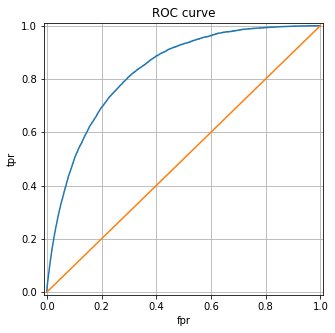

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predicted_labels)
print(roc_auc_score(y_test, test_predicted_labels))
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


In [24]:
def test_cols_clean(data):
    global test_id 
    test_id = data['ID']
    list_del =['ID' , 'PACK']
    for i in data.columns:
        #print('')
        #print(i)
        #print(data[i].unique()[:20])
        if len(data[i].unique()) < 3 or data[i].isnull().sum()!=0:
            list_del.append(i)
    data.drop(list_del, axis=1, inplace=True)
    
    global test_data_all
    test_data_all = data

In [25]:
#Загрузка тестовых данных и очистка
data_test = pd.read_csv('laba04_test.csv')
test_cols_clean(data_test)
test_predicted_labels = model.predict(test_data_all)

df_out = pd.DataFrame()
df_out['id'] = test_id

df_out['target']=test_predicted_labels#.round(decimals=0).astype(int)


In [576]:
df_out.to_csv('/data/home/alexander.chaptykov/lab04.csv', sep='\t', index=False)